# Exploration of Flight Delays
### by Florian Steger

## Preliminary Wrangling

> This dataset reports flights in the United States, including
carriers, arrival and departure delays, and reasons for delays.<br>
Due to the huge size of the data I will use data from the year 2008 only. <br>
More details on the data set can be found here: http://stat-computing.org/dataexpo/2009/the-data.html

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
flight2008 = pd.read_csv('2008.csv')

In [3]:
# basic overview
flight2008.shape

(7009728, 29)

In [4]:
flight2008.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [5]:
flight2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [6]:
# some statistics
flight2008.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [7]:
#creating a copy with which I will work
flights_clean = flight2008.copy()

In [8]:
# for further investigations I create two new columns to count the flights
flights_clean['Count'] = 1

for dataset in flights_clean:
    flights_clean.loc[flights_clean['ArrDelay'] > 15, 'Delay'] = 1.0

In [9]:
flights_clean = flights_clean.astype({'Delay': float})

### What is the structure of your dataset?

The dataset consists of 7,009,728 flights (rows) with 29 features (columns) describing delay times and reasons, carrier information and origin and destination. Most variables are numeric (int or float). 


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the delay (times) of flights in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the carrier and the origin will have a strong effect on the delays as well as the month due to the weather conditions.

## 1. Univariate Exploration

I'll start by looking at the distribution of Arrival Delays.

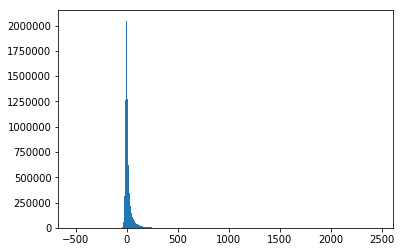

In [10]:
bins = np.arange(flights_clean['ArrDelay'].min()-1, flights_clean['ArrDelay'].max()+1, 10)

plt.hist(data = flights_clean, x = 'ArrDelay', bins = bins);

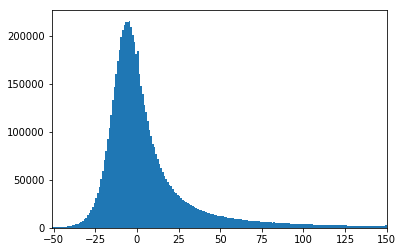

In [11]:
# I want to have a closer look at the distribution of delays so I limit the range
bins = np.arange(-51, 151, 1)

plt.hist(data = flights_clean, x = 'ArrDelay', bins = bins)
plt.xlim(-51, 150);

In [12]:
# confirm the finding that most flights are ahead of time
flights_clean['ArrDelay'].value_counts().nlargest(10)

-5.0     215990
-6.0     215038
-7.0     214615
-8.0     212039
-4.0     209026
-9.0     205918
-3.0     201173
-10.0    199380
-2.0     193287
-11.0    185161
Name: ArrDelay, dtype: int64

The distribution of Arrival Delays nearly looks like normally distributed just squeezed and skewed to the right. Interestingly the huge amount of flights seem to be a little bit ahaed of their scheduled arrival time. 

In [13]:
# Just a quick check for outliers
print(flights_clean['ArrDelay'].nlargest(10))
print(flights_clean['ArrDelay'].nsmallest(10))

1018798    2461.0
2235378    2453.0
2832617    1951.0
3387883    1707.0
6857047    1655.0
5232546    1583.0
2232494    1542.0
527950     1525.0
4061361    1510.0
1634129    1490.0
Name: ArrDelay, dtype: float64
5179806   -519.0
2486419   -129.0
3698229   -109.0
4430894    -92.0
262274     -91.0
1105515    -90.0
6938200    -90.0
2115255    -89.0
3047942    -87.0
375112     -86.0
Name: ArrDelay, dtype: float64


There seem to be a few huge outliers in the Arrival Delay column, some flights are massively delayed and one flight is more than 8 hours too early.

After the interesting findings from above I will now have a look at the flights which are actually delayed (defined as delay >15mins)

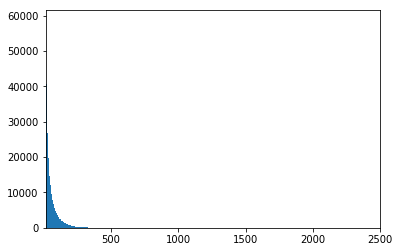

In [14]:
bins = np.arange(15, 2500, 1)

plt.hist(data = flights_clean, x = 'ArrDelay', bins = bins)
plt.xlim(15, 2500);

Due to the huge outliers the chart is not very clear so I will once again define the limits

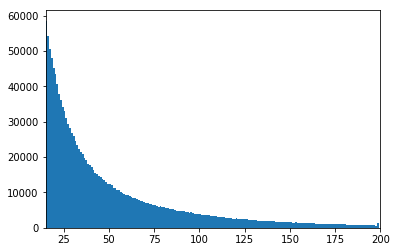

In [15]:
bins = np.arange(15, 200, 1)

plt.hist(data = flights_clean, x = 'ArrDelay', bins = bins)
plt.xlim(15, 200);

The distribution looks like negatively exponential

Next I will have a look at the first predictor variable of interest: Carrier.

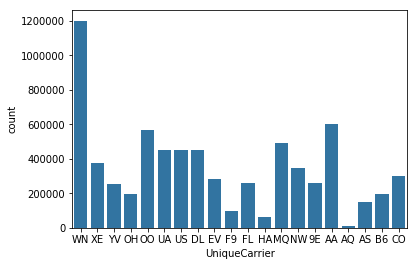

In [16]:
default_color = sb.color_palette()[0]
sb.countplot(data = flights_clean, x = 'UniqueCarrier', color = default_color)
plt.show()

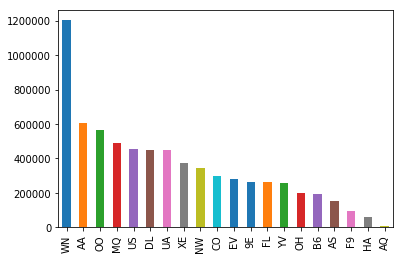

In [17]:
#just plotting the same chart in a different way
pd.value_counts(flights_clean['UniqueCarrier'].values, sort=True).plot.bar();

Obviously Southwestern (WN) has by far the most flights in the dataset, counting double the number of flights from the second biggest airline in the dataset (American Airlines)

Another variable I want to look at is the Origin of the flights

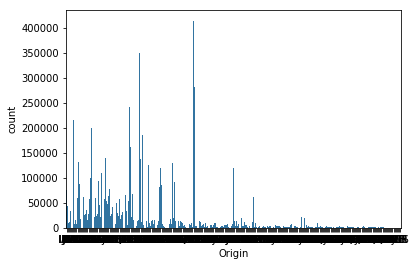

In [18]:
default_color = sb.color_palette()[0]
sb.countplot(data = flights_clean, x = 'Origin', color = default_color)
plt.show()

Due to the huge number of airports I will look at the top 10 only. Therefore I will wrangle my dataset a little bit

In [19]:
airports = flights_clean.groupby(['Origin']).Origin.value_counts().nlargest(10)
airports = pd.DataFrame(airports)
airports.reset_index(level=1, drop=True, inplace=True)

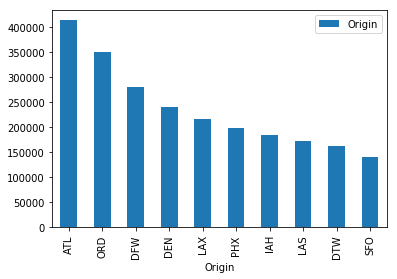

In [20]:
airports.plot.bar();

The biggest airport is Atlanta, followed by Orlando and Dallas. I will check later if the size of the airport has any influence on the average delay times.

Next I will look at the different categories of delay

In [21]:
print(flights_clean.CarrierDelay.max())
print(flights_clean.WeatherDelay.max())
print(flights_clean.NASDelay.max())
print(flights_clean.SecurityDelay.max())
print(flights_clean.LateAircraftDelay.max())

2436.0
1352.0
1357.0
392.0
1316.0


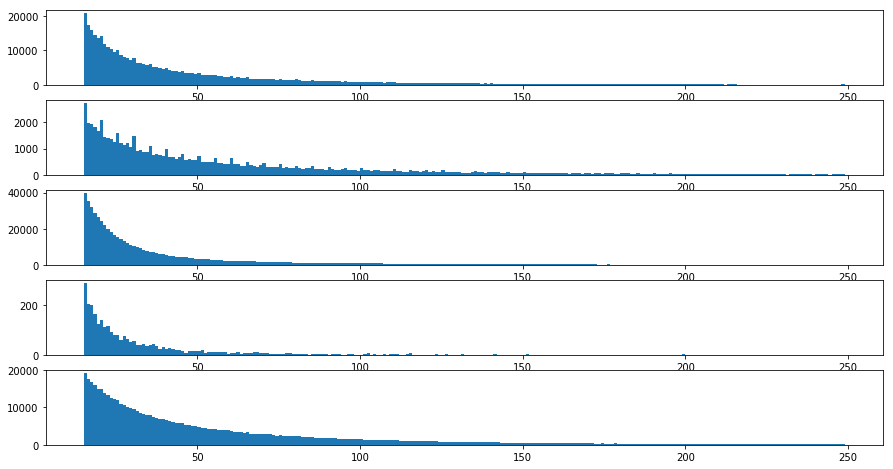

In [22]:
fig, ax = plt.subplots(nrows=5, figsize = [15,8])

variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(15, 250, 1) # I cut the long tail and started at 15mins delay
    ax[i].hist(data = flights_clean, x = var, bins = bins)

plt.show()

Overall the distributions look pretty similar for all delay categories. They look all negatively exponential with long tails to the right.<br>
The longest delays are caused by weather conditions, followed by late aircraft and carrier issues. Interestingly security issues caused the shortest delays and are by far the least common causes for delay. Most short delays are caused by NAS issues.<br>

To put the delays into perspective to each other I will adjust the y-axis

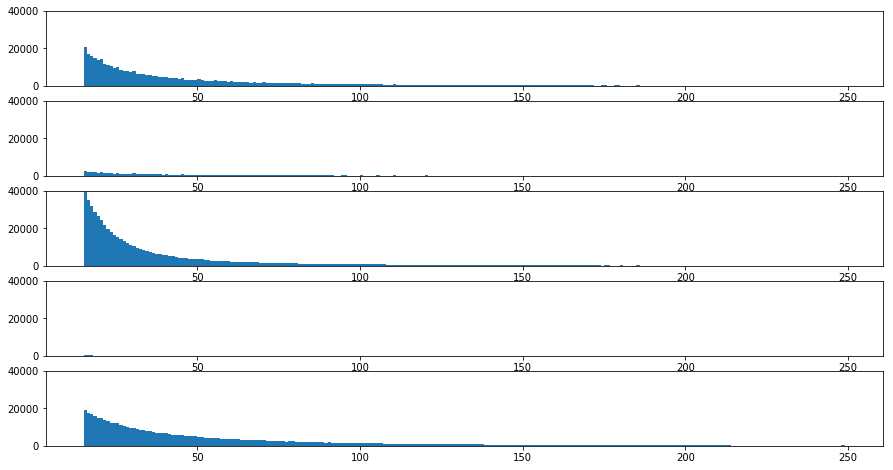

In [23]:
fig, ax = plt.subplots(nrows=5, figsize = [15,8])

variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(15, 250, 1) # I cut the long tail and started at 15mins delay
    ax[i].set_ylim(0, 40000)
    ax[i].hist(data = flights_clean, x = var, bins = bins)

plt.show()

This chart makes it very clear that LateAircraftDelay, NASDelay and CarrierDelay are much more common than WeatherDelay and SecurityDelay.

In [24]:
print(flights_clean.CarrierDelay.mean())
print(flights_clean.WeatherDelay.mean())
print(flights_clean.NASDelay.mean())
print(flights_clean.SecurityDelay.mean())
print(flights_clean.LateAircraftDelay.mean())

15.772063342154539
3.039031044738922
17.16462270492905
0.07497433980331009
20.770981186894772


Just for training purposes I will transform the charts to a log scale even though it does not make a lot of sense :-)

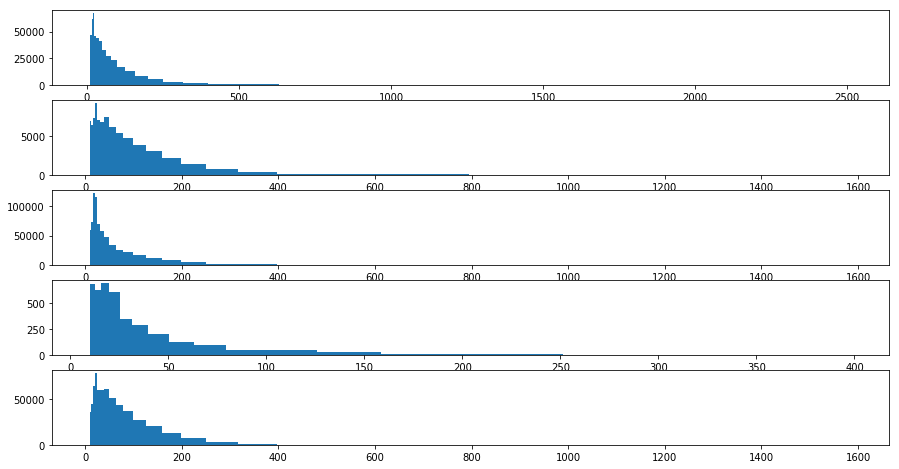

In [25]:
fig, ax = plt.subplots(nrows=5, figsize = [15,8])

variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for i in range(len(variables)):
    var = variables[i]
    log_binsize = 0.1
    bins = 10 ** np.arange(1, np.log10(flights_clean[var].max())+log_binsize, log_binsize)
    ax[i].hist(data = flights_clean, x = var, bins = bins)


Now I will have a look at the distribution of delay causes. Therefore I will create a new column in my dataset. Note that flights with a delay <15 mins are officially not considered delayed.

In [26]:
for dataset in flights_clean:
    flights_clean.loc[flights_clean['CarrierDelay'] >= 15, 'DelayCause'] = 'C'
    flights_clean.loc[flights_clean['WeatherDelay'] >= 15, 'DelayCause'] = 'W'
    flights_clean.loc[flights_clean['NASDelay'] >= 15, 'DelayCause'] = 'N'
    flights_clean.loc[flights_clean['SecurityDelay'] >= 15, 'DelayCause'] = 'S'
    flights_clean.loc[flights_clean['LateAircraftDelay'] >= 15, 'DelayCause'] = 'L'

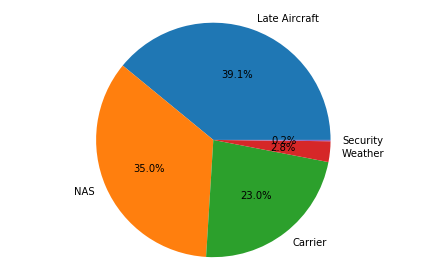

In [27]:
fig, ax = plt.subplots()

values = flights_clean['DelayCause'].value_counts()
labels = ['Late Aircraft', 'NAS', 'Carrier', 'Weather', 'Security']

ax.pie(values, labels=labels, autopct='%1.1f%%')
ax.axis('equal')

fig.tight_layout()
plt.draw()

Most delays are due to late aircraft and reasons caused by the NAS. Only a tiny fraction of delays are caused by Security issues. As found by the previous plot, the longest delays are caused by weather conditions, but only 2.8% of all delays are due to weather.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The arrival delay is distributed over a very long range of values. It is nearly normally distributed just a litte squeezed. Interestingly most flights are not delayed, they are rather ahead of schedule.

Out of the causes for delays, Late Aircraft causes the most delays, followed by NAS issues and Carrier issues. On the other hand the longest delays on average are caused by weather, followed by NAS issues.

The number of flights looks like a negative exponential distribution with one airline having the lions share of flights: Southwestern is #1 on the list, having double the flights from American Airlines which is #2 on the list.

The distribution of flights by airport did not show any obvious outliers.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Investigating the causes of delay showed that the main reaseon of delay is Late Aircraft and NAS reasons. Security delays cause only 0.2% of all delays and these delays are the shortest delays on average. Wethaer conditions causes the longest average delays but is responsible for only 2.8% of the delays.
All delay categories have some very big outliers.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

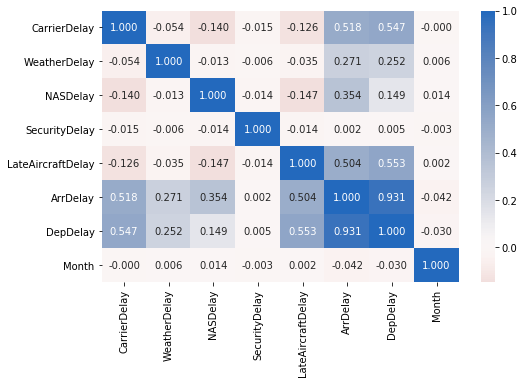

In [28]:
numeric_vars = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'ArrDelay', 'DepDelay', 'Month']

plt.figure(figsize = [8, 5])
sb.heatmap(flights_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

It seems like the numeric variables in this dataset have only weak correlations, which is a little bit surprising. I expected at least some correlation between the delay causes and ArrDelay and DepDelay. The only strong correlation is between Departure and Arrival Delay. (Which was somehow expected)

Now I want to have a closer look at the correlation between Departure and Arrival Delay

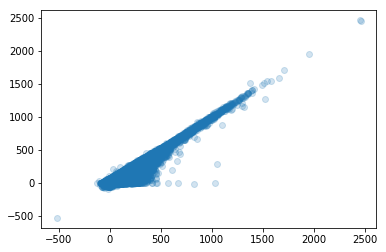

In [29]:
plt.scatter(data = flights_clean, x = 'ArrDelay', y = 'DepDelay', alpha = 1/5);

The correlation between DepDelay and ArrDelay is very strong (as expected). Also it is obvious that a Departure Delay can be compensated during the flight in many cases. There are also two extreme outliers: One delay with over 40h on departure (and arrival) and one flight with a high negative delay time.

Next I will check the average delay over time. To do so I will wrangle my data to get the mean for the delay per for every month.

In [30]:
months_mean = flights_clean.groupby(['Month']).mean()
months_mean

,Year,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Count,Delay
Month,,,,,,,,,,,,,,,,,,,,,
1,2008.0,15.908885,3.848879,1341.313469,1330.337020,1491.156790,1499.829660,2229.870511,128.296963,129.037922,...,16.797139,0.028572,0.002191,15.832279,2.888493,16.277326,0.086770,21.140054,1.0,1.0
2,2008.0,15.175955,3.963895,1343.662104,1330.898420,1487.516365,1498.166706,2230.515229,129.443717,129.520094,...,17.204890,0.036182,0.003013,15.350372,3.483976,16.466292,0.072716,22.371679,1.0,1.0
3,2008.0,16.046248,3.989399,1342.066950,1331.178305,1484.227229,1495.877190,2203.969508,129.636113,130.520187,...,16.576673,0.026267,0.002539,16.063386,3.016375,15.804366,0.096060,21.250829,1.0,1.0
4,2008.0,15.486157,3.837329,1333.228987,1327.559253,1480.582075,1493.157743,2192.093552,127.134764,128.408878,...,16.201354,0.017312,0.001752,15.771317,2.200280,16.076132,0.062577,18.640678,1.0,1.0
5,2008.0,15.927937,4.020917,1332.187572,1326.192806,1482.321906,1492.467210,2231.293175,126.873765,128.419069,...,15.851074,0.010274,0.001409,14.340201,1.998010,16.621472,0.081173,18.682583,1.0,1.0
6,2008.0,15.524878,3.946680,1338.665020,1330.095039,1466.740123,1492.480305,2255.214251,128.914464,129.046188,...,17.217195,0.017959,0.003739,15.111817,3.481261,19.645184,0.064617,21.798618,1.0,1.0
7,2008.0,16.134688,3.845200,1332.689114,1327.296902,1462.373181,1487.076628,2248.272323,128.034124,129.725404,...,16.850324,0.016878,0.003042,17.258815,3.968540,19.393338,0.093724,21.869989,1.0,1.0
8,2008.0,15.698915,4.107118,1331.737391,1325.865128,1471.523854,1487.864263,2223.263805,127.036380,129.641285,...,16.342432,0.016063,0.002767,17.683983,3.310945,17.170741,0.061537,20.670662,1.0,1.0
9,2008.0,15.403644,3.752562,1324.077488,1321.160399,1488.831837,1496.589422,2154.273303,123.226791,126.307087,...,15.628855,0.018327,0.001329,17.128674,2.207087,16.549621,0.067787,15.121941,1.0,1.0


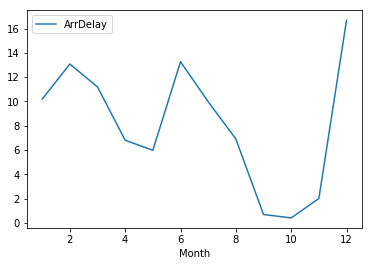

In [31]:
months_mean[['ArrDelay']].plot(kind='line');

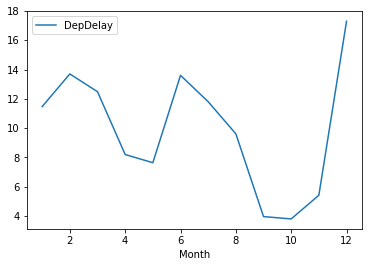

In [32]:
months_mean[['DepDelay']].plot(kind='line');

As seen in the prevoius charts, there is a strong correlation between Departure and Arrival Delay. This becomes even more obvious in these two charts since the average delay over the months are pretty much the same.<br>
The highest average delay is in December, followed by February and June.

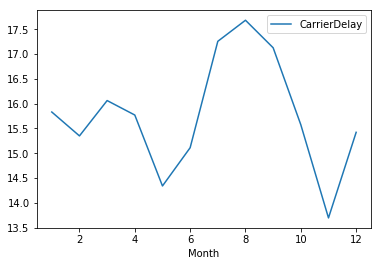

In [33]:
months_mean[['CarrierDelay']].plot(kind='line');

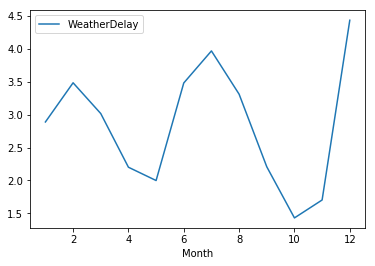

In [34]:
months_mean[['WeatherDelay']].plot(kind='line');

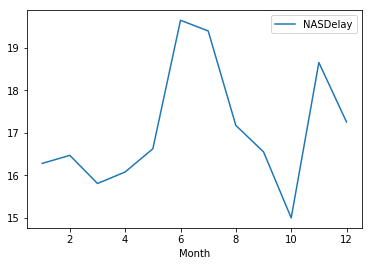

In [35]:
months_mean[['NASDelay']].plot(kind='line');

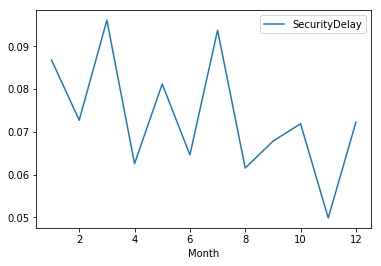

In [36]:
months_mean[['SecurityDelay']].plot(kind='line');

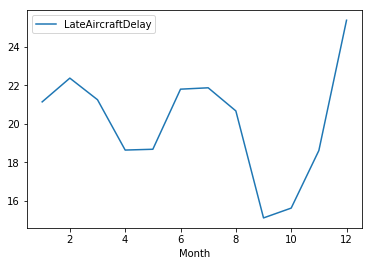

In [37]:
months_mean[['LateAircraftDelay']].plot(kind='line');

Except for the Security Delay line all lines look more or less like the overall Departure and Arrival Delay lines.
Due to the high impact on the overall delay the line of the average Late Aircraft Delay looks most similar to the overall Arrival And Departure delay line.

Now I want to have a look at all delay causes over time together. To do this I will again wrangle my data a little bit.

In [38]:
months_sum = flights_clean.groupby(['Month']).sum()
months_sum

,Year,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Count,Delay
Month,,,,,,,,,,,,,,,,,,,,,
1,1216376120,9637046,2331516,789305300.0,805871605,875502886.0,908544314,1350777510,75326996.0,78152979.0,...,9884394.0,17308,1327,2355954.0,429828.0,2422180.0,12912.0,3145788.0,605765,143175.0
2,1143025888,8638700,2256392,737186777.0,757595293,813559888.0,852810423,1269689567,70796005.0,73716232.0,...,9439291.0,20596,1715,2398296.0,544326.0,2572644.0,11361.0,3495284.0,569236,150684.0
3,1237108720,9885933,2457829,805115358.0,820125642,888076973.0,921594978,1357843574,77566861.0,80398869.0,...,9944462.0,16183,1564,2527895.0,474687.0,2487133.0,15117.0,3344243.0,616090,151506.0
4,1201037008,9262673,2295206,783633335.0,794047706,868691557.0,893096468,1311148148,74592890.0,76790307.0,...,9522686.0,10355,1048,1926766.0,268806.0,1964005.0,7645.0,2277313.0,598126,117013.0
5,1217436344,9656997,2437854,799397803.0,804061415,888222109.0,904872422,1352817433,76024029.0,77852905.0,...,9511659.0,6229,854,1722631.0,240013.0,1996671.0,9751.0,2244264.0,606293,114885.0
6,1222199320,9449450,2402206,800165597.0,809582297,873382140.0,908420525,1372669982,76763149.0,78534542.0,...,10291303.0,10931,2276,2482267.0,571832.0,3226918.0,10614.0,3580641.0,608665,158675.0
7,1260885448,10131471,2414520,822712969.0,833450871,899978090.0,933781514,1411759888,78795145.0,81446019.0,...,10402261.0,10598,1910,2417097.0,555794.0,2716037.0,13126.0,3062892.0,627931,135156.0
8,1229456232,9612116,2514702,802297201.0,811799375,884017955.0,910988043,1361257739,76317105.0,79363283.0,...,9845400.0,9835,1694,2130584.0,398906.0,2068748.0,7414.0,2490422.0,612279,115950.0
9,1086143264,8331954,2029791,703078526.0,714626229,789491791.0,809517191,1165263664,65344210.0,68308262.0,...,8298844.0,9913,719,1218688.0,157032.0,1177489.0,4823.0,1075911.0,540908,67833.0


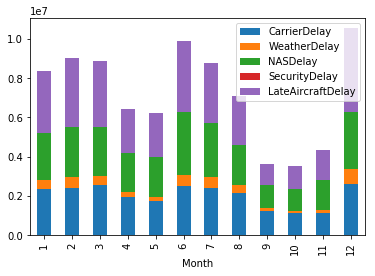

In [39]:
months_sum[['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].plot(kind='bar', stacked=True);

This chart is more or less a summary of the previous charts but makes it more evident which delay causes are most responsible for the overall delays.

Out of curiosity I want to have a quick look at the cancellations over time

In [40]:
for dataset in flights_clean:
    flights_clean.loc[flights_clean['Cancelled'] == 1, 'Status'] = 'C'

In [41]:
flights_cancelled = flights_clean.groupby(['Month']).sum()
flights_cancelled

,Year,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Count,Delay
Month,,,,,,,,,,,,,,,,,,,,,
1,1216376120,9637046,2331516,789305300.0,805871605,875502886.0,908544314,1350777510,75326996.0,78152979.0,...,9884394.0,17308,1327,2355954.0,429828.0,2422180.0,12912.0,3145788.0,605765,143175.0
2,1143025888,8638700,2256392,737186777.0,757595293,813559888.0,852810423,1269689567,70796005.0,73716232.0,...,9439291.0,20596,1715,2398296.0,544326.0,2572644.0,11361.0,3495284.0,569236,150684.0
3,1237108720,9885933,2457829,805115358.0,820125642,888076973.0,921594978,1357843574,77566861.0,80398869.0,...,9944462.0,16183,1564,2527895.0,474687.0,2487133.0,15117.0,3344243.0,616090,151506.0
4,1201037008,9262673,2295206,783633335.0,794047706,868691557.0,893096468,1311148148,74592890.0,76790307.0,...,9522686.0,10355,1048,1926766.0,268806.0,1964005.0,7645.0,2277313.0,598126,117013.0
5,1217436344,9656997,2437854,799397803.0,804061415,888222109.0,904872422,1352817433,76024029.0,77852905.0,...,9511659.0,6229,854,1722631.0,240013.0,1996671.0,9751.0,2244264.0,606293,114885.0
6,1222199320,9449450,2402206,800165597.0,809582297,873382140.0,908420525,1372669982,76763149.0,78534542.0,...,10291303.0,10931,2276,2482267.0,571832.0,3226918.0,10614.0,3580641.0,608665,158675.0
7,1260885448,10131471,2414520,822712969.0,833450871,899978090.0,933781514,1411759888,78795145.0,81446019.0,...,10402261.0,10598,1910,2417097.0,555794.0,2716037.0,13126.0,3062892.0,627931,135156.0
8,1229456232,9612116,2514702,802297201.0,811799375,884017955.0,910988043,1361257739,76317105.0,79363283.0,...,9845400.0,9835,1694,2130584.0,398906.0,2068748.0,7414.0,2490422.0,612279,115950.0
9,1086143264,8331954,2029791,703078526.0,714626229,789491791.0,809517191,1165263664,65344210.0,68308262.0,...,8298844.0,9913,719,1218688.0,157032.0,1177489.0,4823.0,1075911.0,540908,67833.0


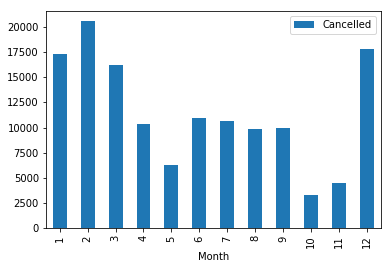

In [42]:
flights_cancelled[['Cancelled']].plot(kind='bar');

Interestingly it seems like the months with the highest average delays are also the months with the most cancellations.

To put all the delays and cancellations into the right perspective I will now have a look at the percentage of flights in time.

In [43]:
# percentage of flights with a delay
(flights_clean.groupby(flights_clean['ArrDelay']>=15.0).sum())['Count'][1] / ((flights_clean.groupby(flights_clean['ArrDelay']>=15.0).sum())['Count'][0] + (flights_clean.groupby(flights_clean['ArrDelay']>=15.0).sum())['Count'][1])

0.21751699923306583

In [44]:
months_sum['DelayPercent'] = months_sum['Delay'] / months_sum['Count']

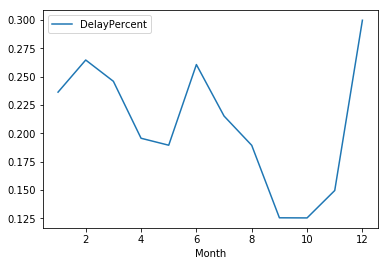

In [45]:
months_sum[['DelayPercent']].plot(kind='line');

This chart correlates with the charts for the number of delays from above. (Which makes sense)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It seems like the numeric variables in this dataset have only weak correlations, which is a little bit surprising. I expected at least some correlation between the delay causes and ArrDelay and DepDelay. The only strong correlation is between Departure and Arrival Delay. (Which was somehow expected)

The correlation between DepDelay and ArrDelay is very strong (as expected). Also it is obvious that a Departure Delay can be compensated during the flight in many cases. There are also two extreme outliers: One delay with over 40h on departure (and arrival) and one flight with a high negative delay time

The highest average delay is in December, followed by February and June

Except for the Security Delay line all lines look more or less like the overall Departure and Arrival Delay lines.
Due to the high impact on the overall delay the line of the average Late Aircraft Delay looks most similar to the overall Arrival And Departure delay line

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Interestingly it seems like the months with the highest average delays are also the months with the most cancellations.

The percentage of flights in time correlates with the charts for the number of delays over the months. (Which makes sense)

## Multivariate Exploration

The last thing I want to explore is the average delays by airline

In [46]:
carrier_sum = flights_clean.groupby(['UniqueCarrier']).sum()

In [47]:
carrier_avg = flights_clean.groupby(['UniqueCarrier']).mean()

In [48]:
frames = [carrier_sum['Count'], carrier_avg['ArrDelay'], carrier_avg['DepDelay']]
airline_data = pd.concat(frames, axis=1)

In [49]:
airline_data['Count'] = airline_data['Count'] / 250

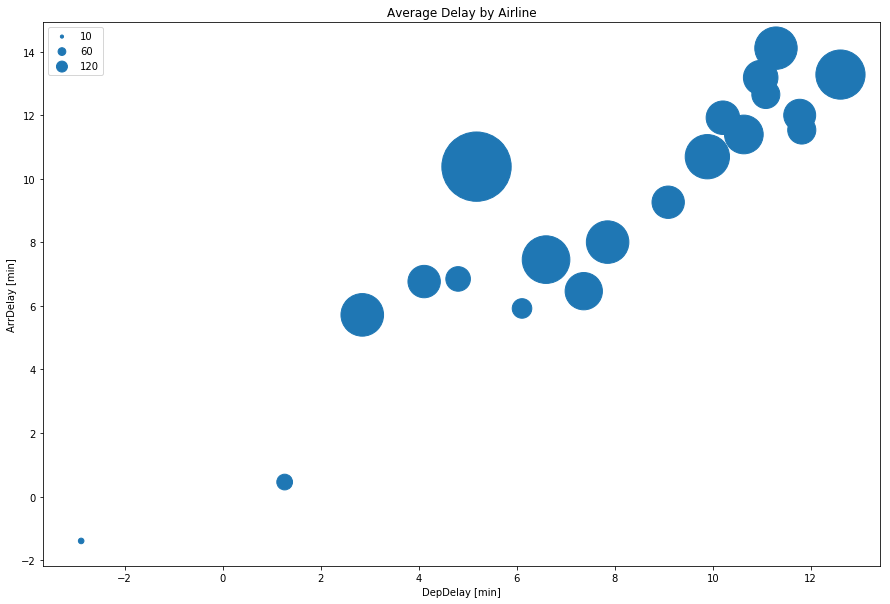

In [50]:
plt.figure(figsize=(15,10))
plt.scatter(data = airline_data, x = 'ArrDelay', y = 'DepDelay', s = 'Count')
plt.title('Average Delay by Airline')
plt.xlabel('DepDelay [min]')
plt.ylabel('ArrDelay [min]');

# Legend
sizes = [10, 60, 120]
base_color = sb.color_palette()
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, sizes);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The size of the airline (by # of flights) does not seem to have a big impact on the average delay. There are smaller and bigger bubbles spread across the chart. Airlines with an average Departure Delay of >6 mins tend to keep this delay until arrival. Airlines with average Departure Delay of <6 mins seem to increase their delay until arrival slightly.
One interesting outlier is the biggest bubble (Soutwestern) which is the biggest airline. They tend to increase the delay from departure to arrival much more than the other airlines.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

#Sources:
- Stackoverflow
- https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_groups/
- This Course
- The official documentations of Python, Pandas, Matplotlib, Seaborn